In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from google.colab import drive
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms

if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

print(f"Device: {device}")


Device: cuda


In [41]:
## Some constant variables
drive.mount('/content/drive')
CAPSTONE_PATH = "/content/drive/MyDrive/CMU/Fall 2023/Capstone Project - Team Cylab/CapStone"  # replace it with your path to the drive for capstone shared with you
DATA_ROOT_PATH = os.path.join(CAPSTONE_PATH, 'data')
CHECKPOINT_PATH = os.path.join(CAPSTONE_PATH, 'Checkpoints')


# Comment and uncomment below two lines to toggle different datasets
DATA_PATH = os.path.join(DATA_ROOT_PATH, 'LOW_QUALITY_WITH_OG')  # Final dataset with both Original dataser and low quality generated dataset
# DATA_PATH = os.path.join(DATA_ROOT_PATH, 'LOW_QUALITY_WITH_NO_OG')  # Final low quality dataset without original images
# TRAIN_DIR = os.path.join(DATA_ROOT_PATH, 'SPLIT_DATA_WITH_NO_OG', 'Train')
# VALID_DIR = os.path.join(DATA_ROOT_PATH, 'SPLIT_DATA_WITH_NO_OG', 'Valid')
# TEST_DIR = os.path.join(DATA_ROOT_PATH, 'SPLIT_DATA_WITH_NO_OG', 'Test')


TRAIN_DIR = os.path.join(DATA_ROOT_PATH, 'SPLIT_DATA_WITH_OG', 'Train')
VALID_DIR = os.path.join(DATA_ROOT_PATH, 'SPLIT_DATA_WITH_OG', 'Valid')
TEST_DIR = os.path.join(DATA_ROOT_PATH, 'SPLIT_DATA_WITH_OG', 'Test')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Codes for removing duplicated images

cattle_classes = os.listdir(DATA_PATH)
counts = 0
for cattle_class in cattle_classes:
    catttle_path = os.path.join(DATA_PATH, cattle_class)
    cattle_images = os.listdir(catttle_path)

    for cattle_image in cattle_images:
        image_path = os.path.join(catttle_path, cattle_image)

        if "(1)" in image_path:
            os.remove(image_path)

In [43]:
cattle_classes = os.listdir(DATA_PATH)

total_images = 0
print("\n")
for cattle_class in cattle_classes:
    imag_path = os.path.join(DATA_PATH, cattle_class)
    images_num = len(os.listdir(imag_path))

    total_images += images_num
    if images_num != 48:
        print(f"{cattle_class}: {images_num}")

print("\n")
print(f"Total images: {total_images}\n\n")
print(f"Images num: {images_num}")

print(f"Total: {len(cattle_classes) * images_num}")





Total images: 12864


Images num: 48
Total: 12864


In [ ]:
# Creating classes/label names
TRAIN_LABELS = sorted(os.listdir(TRAIN_DIR))
VALID_LABELS = sorted(os.listdir(VALID_DIR))
TEST_LABELS = sorted(os.listdir(TEST_DIR))
# Creating configurations
CONFIG = {
    "batch_size": 128
}

In [ ]:
# Loading data using torchvision datasets imagefolder
transformations = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]
)  # converting to tensor and resizing all images to 256x256



train_data = ImageFolder(root=TRAIN_DIR, transform=transformations)
valid_data = ImageFolder(root=VALID_DIR, transform=transformations)
test_data = ImageFolder(root=TEST_DIR, transform=transformations)

In [ ]:
# Create DataLoader instances for each dataset
train_loader = DataLoader(train_data, batch_size=CONFIG['batch_size'], shuffle=True)
val_loader = DataLoader(valid_data, batch_size=CONFIG['batch_size'])
test_loader = DataLoader(test_data, batch_size=CONFIG['batch_size'])

In [ ]:
def normalize_image_and_convert_to_pil(image):
  denormalize_image = transforms.Normalize(mean=[1/0.485, 1/0.456, 1/0.406], std=[1/0.229, 1/0.224, 1/0.225])(image)
  return np.array(transforms.ToPILImage()(denormalize_image))

In [ ]:
def plot_pil_images(images, labels_names, labels_numbers, figsize: tuple=None):
    if len(images) == 0:
        raise ValueError("Images cannot be empty")

    rows = int(np.sqrt(len(images)))
    cols = len(images) // rows

    if cols > rows:  #  I want rows to be greater than cols
        temp = rows
        rows = cols
        cols = temp

    fig, axes = plt.subplots(nrows=rows, ncols=cols)
    if figsize and len(images)!=1:
        fig.set_size_inches(figsize[0], figsize[1])

    if len(images) == 1:
            axes.imshow(normalize_image_and_convert_to_pil(images[0]))
            axes.axis('off')
            axes.set_title(labels_names[0])

    elif len(images) < 3:
        for i in range(len(images)):
            axes[i].imshow(normalize_image_and_convert_to_pil(images[i]))
            axes[i].axis('off')
            axes[i].set_title(labels_names[i])
    else:
        count_image = 0
        for row in range(rows):
            for col in range(cols):
                axes[row, col].imshow(normalize_image_and_convert_to_pil(images[count_image]))
                axes[row, col].axis('off')
                axes[row, col].set_title(labels_names[count_image])
                count_image += 1

    plt.show()

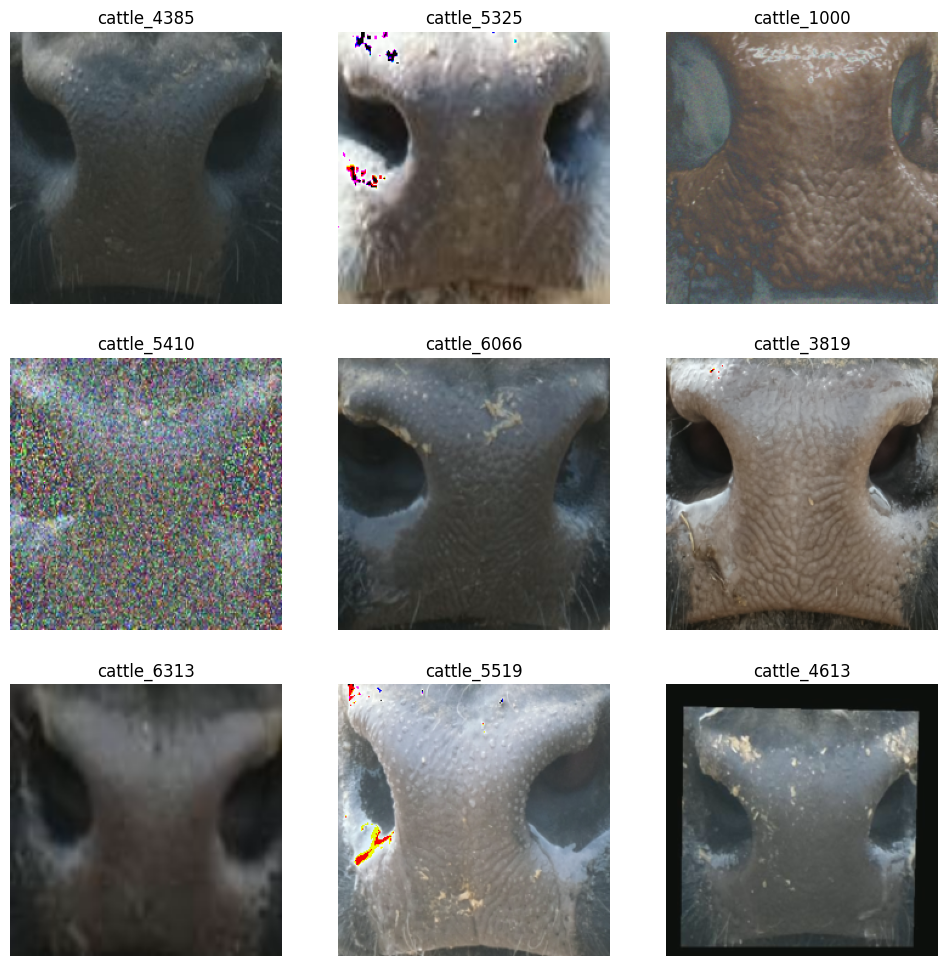

In [ ]:
# Viewing random samples
sample_images_indicies = np.random.randint(0, len(train_data), size=(9,))
sample_images, sample_lables = [], []
labels_num = []
for indx in sample_images_indicies:
  img, label = train_data[indx]
  sample_images.append(img)
  sample_lables.append(TRAIN_LABELS[label])
  labels_num.append(label)


# View sample images from train
plot_pil_images(sample_images, sample_lables, labels_num, (12, 12))